# Challenge
> Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its 21 supportive features allows viewing an order from multiple dimensions: from order status, price and freight performance to customer location, product attributes and finally reviews written by customers.
We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates and a dataset with the payment methods chosen at each order.
This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

Link: https://www.kaggle.com/olistbr/brazilian-ecommerce/home

In [ ]:
!pip install kaggle
!kaggle datasets download -d olistbr/brazilian-ecommerce
# export KAGGLE_USERNAME=tbuzze
!export KAGGLE_KEY=b
!kaggle datasets [-h]

In [ ]:
!pip install zip

In [ ]:
#-- importando biblioteca para leitura do arquivo zip
import zipfile

In [ ]:
#!pip install os-win

In [ ]:
#-- verificando os arquivocs que foram extraídos do zip
import os
arr = os.listdir()
arr

In [ ]:
#-- extraindo os arquivos do arquivo zip
with zipfile.ZipFile('brazilian-ecommerce.zip', 'r') as myzip:
    myzip.extractall()

In [ ]:
#-- verificando os arquivocs que foram extraídos do zip
arr = os.listdir()
arr

# 1- Carregar as Bibliotecas

> Numpy, pandas, plotly, matplotlib...

In [1]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt

# 2- Verificar e Interpretar as variáveis

> Head, dtypes, describe...

<br>
<center>
<img src="https://media1.tenor.com/images/e4848131a1af20a7e1de5e0443afe472/tenor.gif?itemid=4960555" alt="drawing" width="500px"></center>


In [ ]:
geo = pd.read_csv('geolocation_olist_public_dataset.csv')
geo.head()

In [ ]:
geo.shape

In [ ]:
classpublic = pd.read_csv('olist_classified_public_dataset.csv')
classpublic.head()

In [ ]:
classpublic.shape

In [ ]:
seller = pd.read_csv('sellers_olist_public_dataset_.csv')
seller.head()

In [ ]:
seller.shape

In [ ]:
seller.info()

In [37]:
payment = pd.read_csv('payments_olist_public_dataset.csv')
payment.shape

(97433, 5)

In [13]:
payment.head()

,order_id,installments,sequential,payment_type,value
0,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,credit_card,65.71
1,ba78997921bbcdc1373bb41e913ab953,8,1,credit_card,107.78
2,42fdf880ba16b47b59251dd489d4441a,2,1,credit_card,128.45
3,771ee386b001f06208a7419e4fc1bbd7,1,1,credit_card,81.16
4,62fe0bd75deb58982ebf8e53a128a301,1,1,credit_card,15.82


In [14]:
from plotly.offline import init_notebook_mode, iplot

In [38]:
payment['payment_type'].value_counts()

credit_card    71676
boleto         18845
voucher         5635
debit_card      1277
Name: payment_type, dtype: int64

In [39]:
import seaborn as sns

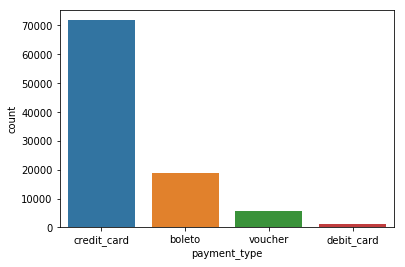

In [40]:
_ = sns.countplot(x='payment_type', data=payment)

In [41]:
import scipy.stats as stats

In [42]:
payment.corr()

,installments,sequential,value
installments,1.000000,-0.087903,0.320565
sequential,-0.087903,1.000000,-0.073580
value,0.320565,-0.073580,1.000000


In [21]:
#result['Cliente '+ str(y)] = result['Cliente '+ str(y)].replace('X', 1)
pay_type = payment['payment_type']

In [23]:
payment['payment_type'] = payment['payment_type'].replace('credit_card', 1)
payment['payment_type'] = payment['payment_type'].replace('boleto', 2)
payment['payment_type'] = payment['payment_type'].replace('voucher', 3)
payment['payment_type'] = payment['payment_type'].replace('debit_card', 4)

In [24]:
payment.corr()

,installments,sequential,payment_type,value
installments,1.000000,-0.087903,-0.374946,0.320565
sequential,-0.087903,1.000000,0.322561,-0.073580
payment_type,-0.374946,0.322561,1.000000,-0.095352
value,0.320565,-0.073580,-0.095352,1.000000


In [71]:
payment.head()

,order_id,installments,sequential,payment_type,value
0,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,credit_card,65.71
1,ba78997921bbcdc1373bb41e913ab953,8,1,credit_card,107.78
2,42fdf880ba16b47b59251dd489d4441a,2,1,credit_card,128.45
3,771ee386b001f06208a7419e4fc1bbd7,1,1,credit_card,81.16
4,62fe0bd75deb58982ebf8e53a128a301,1,1,credit_card,15.82


In [72]:
public = pd.read_csv('olist_public_dataset_v2.csv')
public.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [77]:
public['product_category_name'].value_counts() / len(public)

cama_mesa_banho                       0.10435
beleza_saude                          0.07939
esporte_lazer                         0.07832
moveis_decoracao                      0.07728
relogios_presentes                    0.07130
informatica_acessorios                0.06329
utilidades_domesticas                 0.06230
ferramentas_jardim                    0.04570
cool_stuff                            0.04315
brinquedos                            0.04114
perfumaria                            0.03823
automotivo                            0.03244
telefonia                             0.03108
fashion_bolsas_e_acessorios           0.02809
bebes                                 0.02364
papelaria                             0.01945
pet_shop                              0.01909
eletronicos                           0.01687
moveis_escritorio                     0.01685
consoles_games                        0.01098
malas_acessorios                      0.01059
eletrodomesticos                  

In [78]:
public['customer_state'].value_counts()

SP    41020
RJ    13486
MG    11977
RS     5586
PR     5027
SC     3747
BA     3459
DF     2051
ES     2040
GO     2011
PE     1638
CE     1327
PA     1023
MT      922
MA      763
MS      725
PB      542
RN      519
PI      454
AL      440
SE      339
RO      287
TO      261
AM      156
AC       86
AP       68
RR       46
Name: customer_state, dtype: int64

In [81]:
result = pd.merge(payment, public, left_on='order_id', right_on='order_id', how='right')
result.head()

,order_id,installments,sequential,payment_type,value,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,1.0,credit_card,65.71,delivered,56.99,8.72,1,1,...,54,1536,2,2028bf1b01cafb2d2b1901fca4083222,25e8ea4e93396b6fa0d3dd708e76c1bd,5,NaN,aprovada,2017-12-19 00:00:00.000000,2017-12-22 19:55:30+00:00
1,ba78997921bbcdc1373bb41e913ab953,8.0,1.0,credit_card,107.78,delivered,89.90,17.88,1,1,...,60,188,1,548e5bfe28edceab6b51fa707cc9556f,ba78997921bbcdc1373bb41e913ab953,5,NaN,NaN,2017-12-21 00:00:00.000000,2017-12-21 23:42:31+00:00
2,42fdf880ba16b47b59251dd489d4441a,2.0,1.0,credit_card,128.45,delivered,113.57,14.88,1,1,...,57,242,1,386486367c1f9d4f587a8864ccb6902b,42fdf880ba16b47b59251dd489d4441a,5,NaN,NaN,2018-06-02 00:00:00.000000,2018-06-05 18:19:55+00:00
3,771ee386b001f06208a7419e4fc1bbd7,1.0,1.0,credit_card,81.16,delivered,59.90,21.26,1,1,...,41,799,1,42a2c92a0979a949ca4ea89ec5c7b934,771ee386b001f06208a7419e4fc1bbd7,5,NaN,fiquei muito satisfeita chegou bom rápido,2017-07-04 00:00:00.000000,2017-07-05 03:12:17+00:00
4,62fe0bd75deb58982ebf8e53a128a301,1.0,1.0,credit_card,15.82,delivered,249.90,15.92,1,1,...,38,617,2,05bb531648459f3fb15bda0cdbf21322,62fe0bd75deb58982ebf8e53a128a301,5,NaN,produto excelente boa fixação muito bom mesmo ...,2017-02-18 00:00:00.000000,2017-02-19 03:12:25+00:00


In [82]:
result.shape

(104433, 29)

In [79]:
public.shape

(100000, 25)

In [80]:
payment.shape

(97433, 5)

In [83]:
result['payment_type'].isnull().sum()

7000

In [88]:
#-- dropando o restante de vazios
result_no = result.dropna()
result_no.head()
result_no.shape

(6746, 29)

In [132]:
res_cred = result_no[result_no.payment_type == 'credit_card']
res_cred.head()

,order_id,installments,sequential,payment_type,value,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
10,616105c9352a9668c38303ad44e056cd,1.0,1.0,credit_card,75.78,delivered,39.3,36.48,2,1,...,52,390,1,5d66715cc928aadd0074f61332698593,616105c9352a9668c38303ad44e056cd,2,Regular,comprei 2 produtos chegou apenas 1 aguardo ret...,2018-06-22 00:00:00.000000,2018-06-22 17:58:29+00:00
19,31c887ace04e353762156ec1cf3df71b,7.0,1.0,credit_card,730.73,delivered,689.0,41.73,1,1,...,46,287,1,e1c0f330f39bc1f10c9bce770664c920,31c887ace04e353762156ec1cf3df71b,5,Muito bom,apenas uma crítica construtiva a nota fiscal l...,2018-08-17 00:00:00.000000,2018-08-22 16:29:25+00:00
22,4d680edbaa7d3d9bed69532957368a03,10.0,1.0,credit_card,353.09,delivered,167.0,13.22,1,2,...,48,409,4,0ec96e6d31a1493b0475805c9ae1a0a2,4d680edbaa7d3d9bed69532957368a03,1,Pedido não entregue,se não me derem uma posição quanto o meu pedid...,2018-08-28 00:00:00.000000,2018-08-30 14:07:07+00:00
37,18786e2a92bcd94ae9218f173ffe8f72,8.0,1.0,credit_card,340.07,delivered,330.0,10.07,1,1,...,60,2644,6,bb50f2e236e5eea0100680137654686c,18786e2a92bcd94ae9218f173ffe8f72,5,super recomendo,entrega rápida produto conforme descrito,2018-05-20 00:00:00.000000,2018-05-22 00:06:45+00:00
52,3745fa961ec2b1d9870ca79abbf4811a,2.0,1.0,credit_card,84.58,delivered,69.0,15.58,1,1,...,55,151,6,44d097d59e8430f88a67517cd0c4f865,3745fa961ec2b1d9870ca79abbf4811a,2,Carteira de couro marrom,o produto veio com defeito espero que não demo...,2018-08-29 00:00:00.000000,2018-09-01 01:29:09+00:00


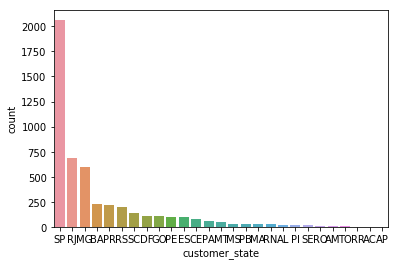

In [133]:
sns.countplot(res_cred['customer_state'], order = res_cred['customer_state'].value_counts().index)

In [134]:
res_bol = result_no[result_no.payment_type == 'boleto']

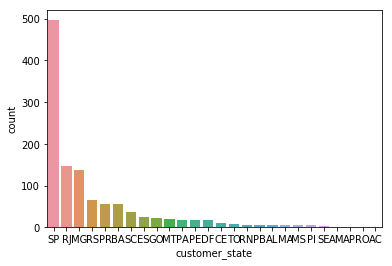

In [135]:
sns.countplot(res_bol['customer_state'], order = res_bol['customer_state'].value_counts().index)

In [136]:
#-- teste do qui quadrado
a1 = result_no['customer_state'][result_no['payment_type'] == 'credit_card'].value_counts()
a2 = result_no['customer_state'][result_no['payment_type'] == 'boleto'].value_counts()

chi2_stat, p_val, dof, ex = stats.chi2_contingency(np.array([a1 , a2]))
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

(0, 500)

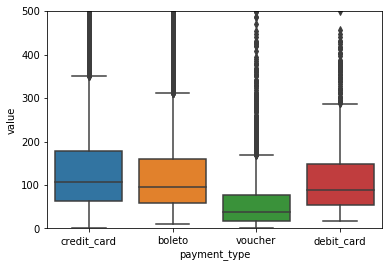

In [54]:
_ = sns.boxplot(x=payment['payment_type'], y=payment['value'])
plt.ylim([0,500])

In [50]:
sum(payment.value == 0)

3

In [55]:
stats.shapiro(payment['value'][payment['payment_type'] == 'credit_card'])

/home/cintia/anaconda3/envs/tera-out2018/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning:

p-value may not be accurate for N > 5000.



(0.48680007457733154, 0.0)

In [56]:
stats.shapiro(payment['value'][payment['payment_type'] == 'boleto'])

(0.3798255920410156, 0.0)

In [57]:
stats.shapiro(payment['value'][payment['payment_type'] == 'voucher'])

(0.5839502811431885, 0.0)

In [58]:
stats.shapiro(payment['value'][payment['payment_type'] == 'debit_card'])

(0.5792151689529419, 0.0)

Text(0.5,1,'payment_type Igual a credit_card Q-Q Plot')

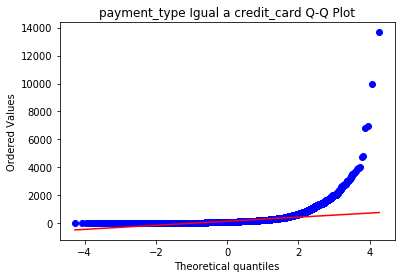

In [60]:
stats.probplot(payment['value'][payment['payment_type'] == 'credit_card'], plot= plt)
plt.title("payment_type Igual a credit_card Q-Q Plot")

In [62]:
#-- teste de variância
stats.levene(payment['value'][payment['payment_type'] == 'credit_card'],
            payment['value'][payment['payment_type'] == 'boleto'],
            payment['value'][payment['payment_type'] == 'voucher'],
            payment['value'][payment['payment_type'] == 'debit_card'])

LeveneResult(statistic=144.6479131240893, pvalue=1.585742901701752e-93)

In [66]:
stats.f_oneway(payment['value'][payment['payment_type'] == 'credit_card'],
            payment['value'][payment['payment_type'] == 'boleto'],
            payment['value'][payment['payment_type'] == 'voucher'],
            payment['value'][payment['payment_type'] == 'debit_card'])

F_onewayResult(statistic=60.25344069978495, pvalue=7.070081918835163e-27)

In [69]:
stats.ttest_ind(payment['value'][payment['payment_type'] == 'boleto'],
            payment['value'][payment['payment_type'] == 'debit_card'])

Ttest_indResult(statistic=3.045766011807869, pvalue=0.0023238866835768755)

In [65]:
stats.kruskal(payment['value'][payment['payment_type'] == 'credit_card'],
            payment['value'][payment['payment_type'] == 'boleto'],
            payment['value'][payment['payment_type'] == 'voucher'],
            payment['value'][payment['payment_type'] == 'debit_card'])

KruskalResult(statistic=5754.429058776404, pvalue=0.0)

# 3- Definir a Hipótese

![Explo](img/what-if.jpg "Variables specification")

Existe correlação entre valor de compra e tipo de pagamento? Não existe correlação.

Se os tipos de pagamento tem a mesma média

# 4- Corrigir os ruídos e Organizar o Dataset

> Drop, fillna, NumericalFeaturesImputer...

<br>
<center>
<img src="http://media.tumblr.com/tumblr_medmv9n8JL1ro2d43.gif" alt="drawing" width="500px"></center>

# 5- Avaliar a Hipótese

> Gráficos ou testes de hipóteses

<br>
<center>
<img src="https://media1.tenor.com/images/c109257362ef9924a11c64fd1b051f43/tenor.gif?itemid=5205898" alt="drawing" width="500px"></center>

# 6- Preparar e Apresentar os Resultados

<br>
<center>
<img src="https://i.imgur.com/CKyA2sd.gif" alt="drawing" width="500px"></center>